In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

In [29]:
import run_pareto_plot

In [30]:
def get_gamma(dt, freq, timeseries_length=None):
    try:
        if dt == 0.1:
            log_g = np.log(freq)*(-1.5) -4
        if dt == 0.01:
            log_g = np.log(freq)*(-1.5) -1.8
        if dt == 0.001:
            log_g = np.log(freq)*(-1.5) -1.2
            
        return np.exp(log_g)
    
    except:
        log_gs = []
        for f in freq:
            if dt == 0.1:
                log_gs.append(np.log(freq)*(-1.5) -4) 
            if dt == 0.01:
                log_gs.append(np.log(freq)*(-1.5) -1.8) 
            if dt == 0.001:
                log_gs.append(np.log(freq)*(-1.5) -1.2) 
            
        return np.exp(np.array(log_gs))
            


In [31]:
# define problem
example = 'example_7'
dt = 0.01
noise = 0.25
timeseries_length = 4
cutoff_freq = 2
problem = 'lorenz_x'
read_existing = True
simdt = 0.0001

# define method
method_parent = 'linear_model'
method = 'savgoldiff'

In [33]:
r = pynumdiff.utils.simulate.lorenz_x(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt)

In [34]:
x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)
print('done simulating')

fname = run_pareto_plot.run_pareto_analysis_on_specific(noise, dt, timeseries_length, problem, method, method_parent, simdt=simdt, frequencies=frequencies, read_existing=read_existing, num_gammas=100)


done simulating
pareto_data/pareto_data_savgoldiff_linear_model_lorenz_x_0.25_0.01_4_auto.pickle
running experiment


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [138]:
params_list = run_pareto_plot.get_params_for_method(method, method_parent)

In [149]:
def plot_pareto_and_examples(method, method_parent, x, dxdt_truth, t, dt, data, ax_pareto, ax_examples, ax_metrics, plot_pareto=False):
        
    keys = ['rmses', 'errcorrs', 'rmses_gamma', 'errcorrs_gamma']
    for key in keys:
        data[key][np.where(data[key]==None)] = np.nan
        data[key] = data[key].astype(float)
    
    print('n data pts: ', len(data['rmses']))
    #idx, opt_logrmse, opt_errcorr = find_elbow(np.log(data['rmses_gamma']), data['errcorrs_gamma'])
    #opt_gamma = data['metadata']['gammas'][idx]
    
    ax_pareto.plot((data['rmses']), data['errcorrs'], '.', color='gray', zorder=-10, markersize=2)
    ax_pareto.set_rasterization_zorder(0)
    if plot_pareto:
        ax_pareto.plot((data['rmses_gamma']), data['errcorrs_gamma'], '-', color='violet')
        ax_pareto.plot((data['rmses_gamma']), data['errcorrs_gamma'], '.', color='violet')
        #ax.plot(np.exp(opt_logrmse), opt_errcorr, '*', color='red', markersize=20)
        #ax.set_xlim(0, 5)
    ax_pareto.set_ylim(0, 1)
           
    # plot points of interest
    df = pandas.DataFrame({'rmses': data['rmses'], 'errcorrs': data['errcorrs']})
    colors = ['limegreen', 'red', 'dodgerblue', 'lightseagreen', 'saddlebrown']
    ms = 10
    padding = 10

    ###
    dfq1 = df.query('errcorrs > 0.95 and errcorrs < 1')
    idx = dfq1.rmses.idxmin()
    params_1 = params_list[idx]
    print(params_1)
    print(colors[0])
    ax_pareto.plot(dfq1.rmses.loc[idx], dfq1.errcorrs.loc[idx], 'o', color=colors[0], markersize=ms)
    
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params_1)
    ax_examples[0].plot(t, xdot_smooth, color=colors[0])
    ax_examples[0].plot(t, dxdt_truth, '--', color='black')
    
    errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
    ax_metrics[0].plot(dxdt_truth[padding:-padding], errors, '.', color=colors[0], markersize=2)
    r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
    rx = np.linspace(np.min(dxdt_truth), np.max(dxdt_truth), 100 )
    ry = r[0]*rx + r[1]
    #ax_metrics[0].plot(rx, ry, color='black')
    print('rsq: ', r[2]**2)
    print('rmse: ', np.sqrt(sum(errors**2) ) )
    
    ###
    goldgamma, opt_rmse, opt_errcorr, idx_opt = get_goldilocks_gamma(data)
    #dfq2 = df.query('errcorrs > 0.3 and errcorrs < 0.5')
    #idx = dfq2.rmses.idxmax()
    params_2 = data['metadata']['params'][idx_opt]
    print(params_2)
    print(colors[1])
    ax_pareto.plot(opt_rmse, opt_errcorr, '*', color='red', markersize=20)
    
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params_2)
    ax_examples[2].plot(t, xdot_smooth, color=colors[1])
    ax_examples[2].plot(t, dxdt_truth, '--', color='black')
    
    errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
    ax_metrics[2].plot(dxdt_truth[padding:-padding], errors, '.', color=colors[1], markersize=2)
    r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
    rx = np.linspace(np.min(dxdt_truth), np.max(dxdt_truth), 100 )
    ry = r[0]*rx + r[1]
    #ax_metrics[1].plot(rx, ry, color='black')
    print('rsq: ', r[2]**2)
    print('rmse: ', np.sqrt(sum(errors**2) ) )
    
    
    ###
    dfq3 = df.query('errcorrs < 0.07')
    idx = dfq3.rmses.idxmin()
    params_3 = params_list[idx]
    print(params_3)
    print(colors[2])
    ax_pareto.plot(dfq3.rmses.loc[idx], dfq3.errcorrs.loc[idx], 'o', color=colors[2], markersize=ms)
    
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params_3)
    ax_examples[3].plot(t, xdot_smooth, color=colors[2])
    ax_examples[3].plot(t, dxdt_truth, '--', color='black')
    
    errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
    ax_metrics[3].plot(dxdt_truth[padding:-padding], errors, '.', color=colors[2], markersize=2)
    r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
    rx = np.linspace(np.min(dxdt_truth), np.max(dxdt_truth), 100 )
    ry = r[0]*rx + r[1]
    #ax_metrics[2].plot(rx, ry, color='black')
    print('rsq: ', r[2]**2)
    print('rmse: ', np.sqrt(sum(errors**2) ) )
    
    
    ###
    dfq4 = df.query('errcorrs < 0.1 and rmses > 3')
    idx = dfq4.rmses.idxmin()
    params_4 = params_list[idx]
    print(params_4)
    print(colors[3])
    ax_pareto.plot(dfq4.rmses.loc[idx], dfq4.errcorrs.loc[idx], 'o', color=colors[3], markersize=ms)
    
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params_4)
    ax_examples[4].plot(t, xdot_smooth, color=colors[3])
    ax_examples[4].plot(t, dxdt_truth, '--', color='black')
    
    errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
    ax_metrics[4].plot(dxdt_truth[padding:-padding], errors, '.', color=colors[3], markersize=2)
    r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
    rx = np.linspace(np.min(dxdt_truth), np.max(dxdt_truth), 100 )
    ry = r[0]*rx + r[1]
    #ax_metrics[3].plot(rx, ry, color='black')
    print('rsq: ', r[2]**2)
    print('rmse: ', np.sqrt(sum(errors**2) ) )
    
    
    ###
    dfq5 = df.query('errcorrs > 0.65')
    idx = dfq5.rmses.idxmin()
    params_5 = params_list[idx]
    print(params_5)
    print(colors[4])
    ax_pareto.plot(dfq5.rmses.loc[idx], dfq5.errcorrs.loc[idx], 'o', color=colors[4], markersize=ms)
    
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params_5)
    ax_examples[1].plot(t, xdot_smooth, color=colors[4])
    ax_examples[1].plot(t, dxdt_truth, '--', color='black')
    
    errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
    ax_metrics[1].plot(dxdt_truth[padding:-padding], errors, '.', color=colors[4], markersize=2)
    r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
    rx = np.linspace(np.min(dxdt_truth), np.max(dxdt_truth), 100 )
    ry = r[0]*rx + r[1]
    #ax_metrics[3].plot(rx, ry, color='black')
    print('rsq: ', r[2]**2)
    print('rmse: ', np.sqrt(sum(errors**2) ) )
    
    
    

In [150]:
def get_goldilocks_gamma(data):
    rmses = data['rmses_gamma']
    errcorrs = data['errcorrs_gamma']

    threshold = 0.25
    while len(np.where(errcorrs<threshold)[0]) < 1:
        threshold += 0.05
        
    idx_errcorr_okay = np.where(errcorrs<threshold)

    idx_opt =  idx_errcorr_okay[0][np.argmin(rmses[idx_errcorr_okay])]

    opt_rmse = rmses[idx_opt]
    opt_errcorr = errcorrs[idx_opt]
    
    return data['metadata']['gammas'][idx_opt], opt_rmse, opt_errcorr, idx_opt

In [151]:
def plot_goldilocks_gamma(data, dt, cutoff_freq, x, x_truth, dxdt_truth, ax):
    tvgamma = get_gamma(dt, cutoff_freq)

    #params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=tvgamma)
    #print(params)

    #rmse, errcorr = run_pareto_plot.get_rmse_errcorr_for_params(x, x_truth, dxdt_truth, dt, method_parent, method, params)
    
    #print('goldilocks rmse and errcorr: ', rmse, errcorr)
    
    tvgamma, opt_rmse, opt_errcorr, idx_opt = get_goldilocks_gamma(data)
    
    ax.plot(opt_rmse, opt_errcorr, '*', color='red', markersize=20, markeredgecolor='black')
    
    #ax.set_xlim(1e-1, 1e2)

In [152]:
def load_data(fname):
    f = open(fname, 'rb')
    data = pickle.load(f)
    f.close()
    return data

In [153]:
data = load_data(fname)

In [154]:
figure_layout = 'fig_1.svg'

n data pts:  5481
[1, 20, 111]
limegreen
rsq:  0.9526204908787408
rmse:  72.4294381236359
[8, 58, 18]
red
rsq:  0.18309404916372116
rmse:  25.516473137168155
[10, 93, 9]
dodgerblue
rsq:  0.05884486743978277
rmse:  24.544588014455655
[1, 8, 4]
lightseagreen
rsq:  0.011601612593717035
rmse:  58.61121721557586
[1, 10, 31]
saddlebrown
rsq:  0.6517013247998896
rmse:  32.24643829659948


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


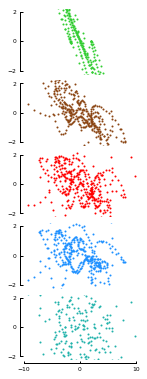

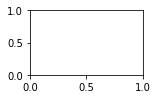

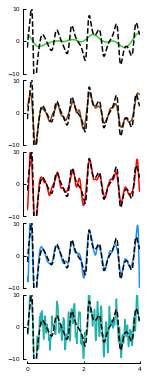

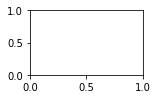

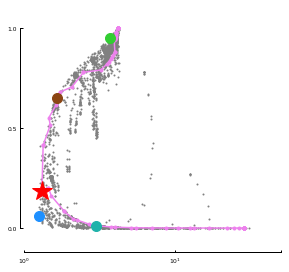

In [155]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])
ax_pareto = layout.axes[('pareto', 'pareto')]
ax_examples = [layout.axes[('params', 'param_'+str(i))]  for i in [1,2,3,4,5]]
ax_metrics = [layout.axes[('metrics', 'param_'+str(i))]  for i in [1,2,3,4,5]]

plot_pareto_and_examples(method, method_parent, x, dxdt_truth, t, dt, data, ax_pareto, ax_examples, ax_metrics, plot_pareto=True)

#plot_goldilocks_gamma(data, dt, cutoff_freq, x, x_truth, dxdt_truth, ax_pareto)

# prep pareto spines
ax_pareto.set_xscale('log')
ax_pareto.set_ylim(-0.1, 1.1)
ax_pareto.set_xlim(1, 50)
xticks = [1, 10, 50]
yticks = [0, 0.5, 1]
ax_pareto.minorticks_off()
fifi.mpl_functions.adjust_spines(ax_pareto, ['left', 'bottom'], 
                                 xticks=xticks,
                                 yticks=yticks,
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


# prep example spines
xticks = [0, 2, 4]
yticks = [-10, 0, 10]
for i, ax in enumerate(ax_examples):
    ax.set_xlim(0, 4)
    ax.set_ylim(-10, 10)
    if i == 4:
        fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                                 xticks=xticks, 
                                                 yticks=yticks,
                                                 tick_length=2.5,
                                                 spine_locations={'left': 4, 'bottom': 4})
    else:
        fifi.mpl_functions.adjust_spines(ax, ['left'], 
                                                 xticks=xticks, 
                                                 yticks=yticks,
                                                 tick_length=2.5,
                                                 spine_locations={'left': 4, 'bottom': 4})
        
# prep metrics spines
xticks = [-10, 0, 10]
yticks = [-2, 0, 2]
for i, ax in enumerate(ax_metrics):
    ax.set_ylim(-2.2, 2.2)
    ax.set_xlim(-10, 10)
    if i == 4:
        fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                         xticks=xticks, 
                                         yticks=yticks,
                                         tick_length=2.5,
                                         spine_locations={'left': 4, 'bottom': 4})
    else:
        fifi.mpl_functions.adjust_spines(ax, ['left'], 
                                         xticks=xticks, 
                                         yticks=yticks,
                                         tick_length=2.5,
                                         spine_locations={'left': 4, 'bottom': 4})
        

fifi.mpl_functions.set_fontsize(ax_pareto, 6)
fifi.mpl_functions.set_fontsize(ax_examples[0], 6)
fifi.mpl_functions.set_fontsize(ax_metrics[0], 6)

layout.append_figure_to_layer(layout.figures['pareto'], 'pareto', cleartarget=True)
layout.append_figure_to_layer(layout.figures['params'], 'params', cleartarget=True)
layout.append_figure_to_layer(layout.figures['metrics'], 'metrics', cleartarget=True)
layout.write_svg(figure_layout)

In [156]:
padding = 10

# data
ax_data = layout.axes[('data', 'data')]
ax_data.plot(t, x, '.', color='blue', zorder=-10, markersize=2)
ax_data.set_rasterization_zorder(0)

# finite difference
x_smooth, xdot_smooth = pynumdiff.finite_difference.first_order(x, dt)
ax_fd = layout.axes[('finite_difference', 'finite_difference')]
ax_fd.plot(t, xdot_smooth, color='darkorange')
ax_fd.plot(t, dxdt_truth, '--', color='black')

errors = (xdot_smooth[padding:-padding] - dxdt_truth[padding:-padding])
r = scipy.stats.linregress(dxdt_truth[padding:-padding], errors)
print('rsq: ', r[2]**2)
print('rmse: ', np.sqrt(sum(errors**2) ) )


# spines
xticks = [0, 2, 4]
yticks = [-2,0,2]
ax_data.set_xlim(0, 4)
ax_data.set_ylim(-2.2, 2.2)
fifi.mpl_functions.adjust_spines(ax_data, ['left', 'bottom'], 
                                         xticks=xticks, 
                                         yticks=yticks,
                                         tick_length=2.5,
                                         spine_locations={'left': 4, 'bottom': 4})

xticks = [0, 2, 4]
yticks = [-20, 0, 20]
ax_fd.set_xlim(0, 4)
ax_fd.set_ylim(-20, 20)
fifi.mpl_functions.adjust_spines(ax_fd, ['left', 'bottom'], 
                                         xticks=xticks, 
                                         yticks=yticks,
                                         tick_length=2.5,
                                         spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax_data, 6)
fifi.mpl_functions.set_fontsize(ax_fd, 6)

layout.append_figure_to_layer(layout.figures['data'], 'data', cleartarget=True)
layout.append_figure_to_layer(layout.figures['finite_difference'], 'finite_difference', cleartarget=True)
layout.write_svg(figure_layout)


rsq:  3.7423169697450716e-05
rmse:  341.09019545316136
